In [ ]:
import random
import json
import numpy
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
# gr*.json contiene el mapa de distancias entre ciudades en formato JSON 
with open("config_17.json", "r") as tsp_data:
    tsp = json.load(tsp_data)

# matriz de distancia
distance_map = tsp["DistanceMatrix"]
# número de ciudades que visitar 
IND_SIZE = tsp["TourSize"]

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
# Generación de un tour aleatorio
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)

# Generación de inviduos y población
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 100)

In [ ]:
def evalTSP(individual):
    """
    Función objetivo, calcula la distancia que recorre el viajante
    """
    # distancia entre el último elemento y el primero
    distance = distance_map[individual[-1]][individual[0]]
    # distancia entre el resto de ciudades
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

# registro de operaciones genéticas
toolbox.register("evaluate", evalTSP)  
toolbox.register("mate", tools.cxOrdered)                       
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05) 

def configura_torneo(k):
    toolbox.register("select", tools.selTournament, tournsize=k)

In [ ]:
def plot_evolucion(log):
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")

    ax1.fill_between(gen, fit_mins, fit_maxs, facecolor="g", alpha=0.2)

    ax1.set_xlabel("Generación")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"])

    ax1.set_ylim([2000, 6000])
    plt.grid(True)

In [ ]:
def main(c, m, n_initial):
    CXPB, MUTPB, NGEN = c, m, n_initial
    pop = toolbox.population() 
    MU, LAMBDA = len(pop), len(pop)
    hof = tools.HallOfFame(1) 

    stats = tools.Statistics(lambda ind: ind.fitness.values) 
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    logbook = tools.Logbook()     
    pop, logbook = algorithms.eaMuPlusLambda(
        pop, toolbox, MU, 
        LAMBDA, CXPB, MUTPB, 
        NGEN, stats=stats, 
        halloffame=hof, verbose=False
    )

    return hof, logbook

Mejor fitness: 2189.000000
Mejor individuo [15, 11, 8, 3, 6, 7, 5, 16, 13, 14, 9, 1, 4, 10, 2, 12, 0]


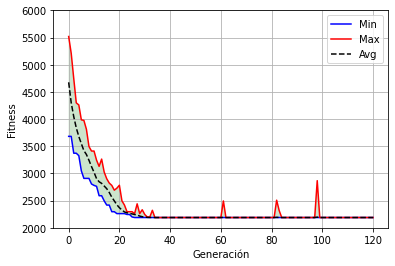

In [ ]:
random.seed(100)
k=3
args = 0.7, 0.3, 120

configura_torneo(k)
best, log = main(*args)

print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

In [ ]:
# ajustando las probabilidades
random.seed(100)
prob_cruce = [0.8, 0.7, 0.6]
prob_mutacion = [0.2, 0.3, 0.4]
n_initial = 120
k=3

fichero_fitness = open("FitnessTSP.txt", "w")
fichero_individuos = open("IndividuosTSP.txt", "w")
configura_torneo(k)

for c, m in zip(prob_cruce, prob_mutacion):
    for i in range(10):
        args = c, m, n_initial
        best, log = main(*args)

        fichero_fitness.write(str(i)+","+str(c)+","+str(m)+",")
        fichero_fitness.write(str(best[0].fitness.values[0]))
        fichero_fitness.write("\n")

        fichero_individuos.write(str(i)+","+str(c)+","+str(m)+",")
        fichero_individuos.write(str(best[0]))
        fichero_individuos.write("\n")

fichero_fitness.close()
fichero_individuos.close()

Mejor fitness: 2189.000000
Mejor individuo [15, 11, 8, 3, 6, 7, 5, 16, 13, 14, 9, 1, 4, 10, 2, 12, 0]
Mejor fitness: 2185.000000
Mejor individuo [6, 12, 8, 11, 15, 0, 3, 7, 5, 2, 10, 4, 1, 9, 14, 13, 16]
Mejor fitness: 2090.000000
Mejor individuo [0, 6, 7, 5, 2, 10, 4, 1, 9, 14, 13, 16, 12, 3, 8, 11, 15]


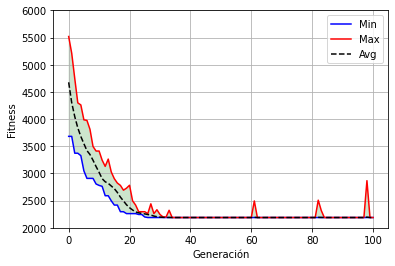

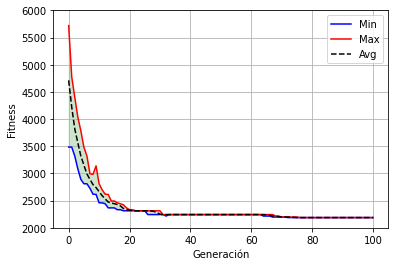

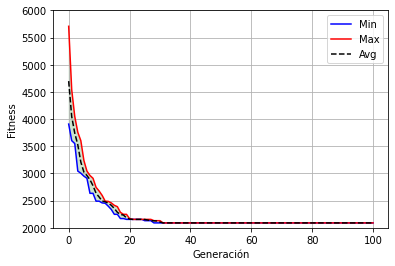

In [ ]:
# ajustando el valor de tournsize
c, m, n_initial = 0.7, 0.3, 100
random.seed(100)

for k in [3, 5, 10]:
    configura_torneo(k)
    args = c, m, n_initial
    best, log = main(*args)

    print("Mejor fitness: %f" %best[0].fitness.values)
    print("Mejor individuo %s" %best[0])
    plot_evolucion(log)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=183a4102-ed36-4d8f-a68e-0f907c31c07b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>